In [1]:
"""
PRODUCT FEATURE ADOPTION ANALYSIS - VISUALIZATIONS
Loads SQL query results from CSV files and creates portfolio-ready visualizations
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [2]:
#Adoption Rates CSV

try:
    # Read CSV without headers(my SQL exports without headers)
    df1 = pd.read_csv(r"C:\Users\Lilian\Documents\feature_adoption_rates.csv")
    
    # Add proper column names
    df1.columns = ['feature_name', 'adopters', 'total_users', 'adoption_rate_pct', 'adoption_status']
    
    # Save back with headers
    df1.to_csv('01_adoption_rates.csv', index=False)
    print(f"   Columns: {list(df1.columns)}")
    print(df1.head())
    
except FileNotFoundError:
    print("   ❌ File not found: 01_adoption_rates.csv")
except Exception as e:
    print(f"   ❌ Error: {e}")

# Time to First Use CSV

try:
    df2 = pd.read_csv(r"C:\Users\Lilian\Documents\time_to_first_use_by_feature.csv")
    
    # Add proper column names based on the SQL query executed
    df2.columns = ['feature_name', 'avg_days_to_first_use', 'min_days', 'max_days', 'total_adopters']
    
    df2.to_csv('02_time_to_first_use.csv', index=False)
    print(f"   Columns: {list(df2.columns)}")
    print(df2.head())
    
except FileNotFoundError:
    print("   ❌ File not found: 02_time_to_first_use.csv")
except Exception as e:
    print(f"   ❌ Error: {e}")

# Business Impact CSV

try:
    df3 = pd.read_csv(r"C:\Users\Lilian\Documents\business_impact.csv")
    
    # Add proper column names based on the query
    df3.columns = ['feature_name', 'current_adopters', 'total_users', 
                   'current_adoption_pct', 'avg_mrr_adopters', 'avg_mrr_all', 
                   'revenue_multiplier', 'avg_retention_adopters', 'avg_retention_all',
                   'retention_lift_pct', 'potential_annual_revenue']
    
    df3.to_csv('03_business_impact.csv', index=False)
    print(f"   Columns: {list(df3.columns)}")
    print(df3.head())
    
except FileNotFoundError:
    print("   ❌ File not found: 03_business_impact.csv")
except Exception as e:
    print(f"   ❌ Error: {e}")

# Power Users CSV

try:
    df4 = pd.read_csv(r"C:\Users\Lilian\Documents\power_user_analysis.csv")
    
    # Add proper column names based on the SQL query executed
    df4.columns = ['user_segment', 'user_count', 'avg_features_adopted', 
                   'avg_mrr', 'avg_retention_rate', 'pct_of_users']
    
    df4.to_csv('04_power_users.csv', index=False)
    print(f"   Columns: {list(df4.columns)}")
    print(df4)
    
except FileNotFoundError:
    print("   ❌ File not found: 04_power_users.csv")
except Exception as e:
    print(f"   ❌ Error: {e}")


   Columns: ['feature_name', 'adopters', 'total_users', 'adoption_rate_pct', 'adoption_status']
    feature_name  adopters  total_users  adoption_rate_pct    adoption_status
0      Dashboard      1799         2000              89.95      High Adoption
1   Kanban_Board      1791         2000              89.55      High Adoption
2    Gantt_Chart       803         2000              40.15  Moderate Adoption
3  Time_Tracking       802         2000              40.10  Moderate Adoption
4      Reporting       788         2000              39.40       Low Adoption
   Columns: ['feature_name', 'avg_days_to_first_use', 'min_days', 'max_days', 'total_adopters']
    feature_name  avg_days_to_first_use  min_days  max_days  total_adopters
0   Kanban_Board                     12         0       133            1791
1  Task_Creation                     12         0       135            1812
2    Gantt_Chart                     69         7       318             803
3  Time_Tracking                    

   ✅ Saved: viz_01_feature_adoption_rates.png


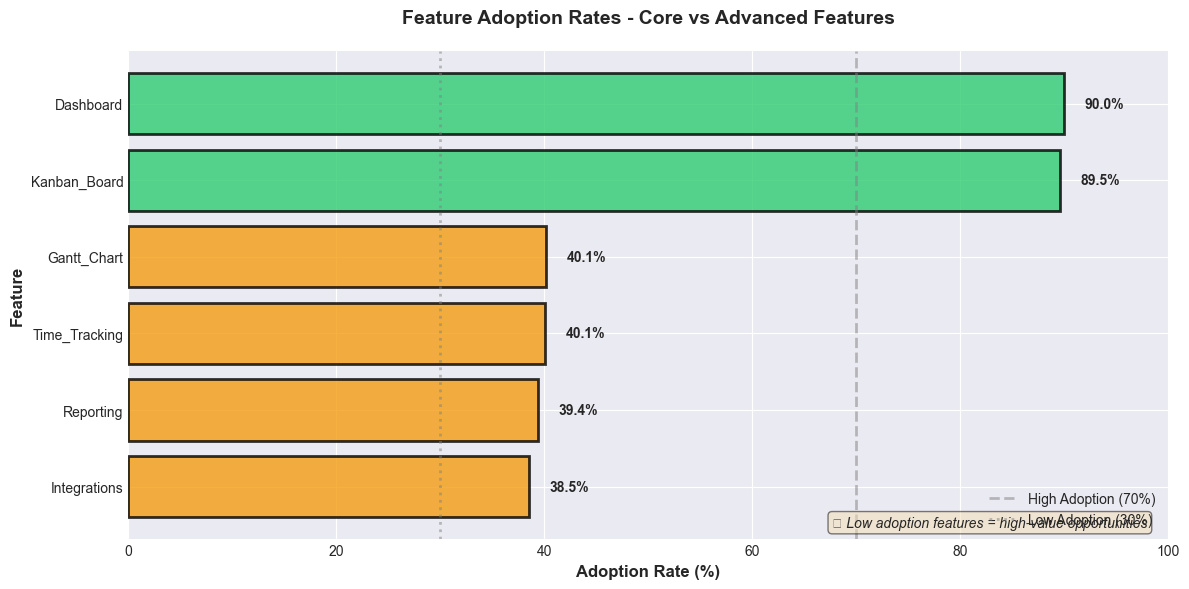

In [4]:
# VISUALIZATION 1: Feature Adoption Overview (Bar Chart)

fig, ax = plt.subplots(figsize=(12, 6))

# Sort by adoption rate
adoption_sorted = df1.sort_values('adoption_rate_pct', ascending=True)

colors = ['#2ecc71' if x > 70 else '#f39c12' if x > 30 else '#e74c3c' 
          for x in adoption_sorted['adoption_rate_pct']]

bars = ax.barh(adoption_sorted['feature_name'], adoption_sorted['adoption_rate_pct'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels
for bar, val in zip(bars, adoption_sorted['adoption_rate_pct']):
    ax.text(val + 2, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
            va='center', fontweight='bold', fontsize=10)

# Add reference lines
ax.axvline(x=70, color='gray', linestyle='--', alpha=0.5, linewidth=2, label='High Adoption (70%)')
ax.axvline(x=30, color='gray', linestyle=':', alpha=0.5, linewidth=2, label='Low Adoption (30%)')

ax.set_xlabel('Adoption Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Feature Adoption Rates - Core vs Advanced Features', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)

# Add annotation
ax.text(0.98, 0.02, '🚨 Low adoption features = high-value opportunities', 
        transform=ax.transAxes, fontsize=10, style='italic',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.savefig('viz_01_feature_adoption_rates.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: viz_01_feature_adoption_rates.png")
plt.show()


   ✅ Saved: viz_02_discovery_vs_adoption.png


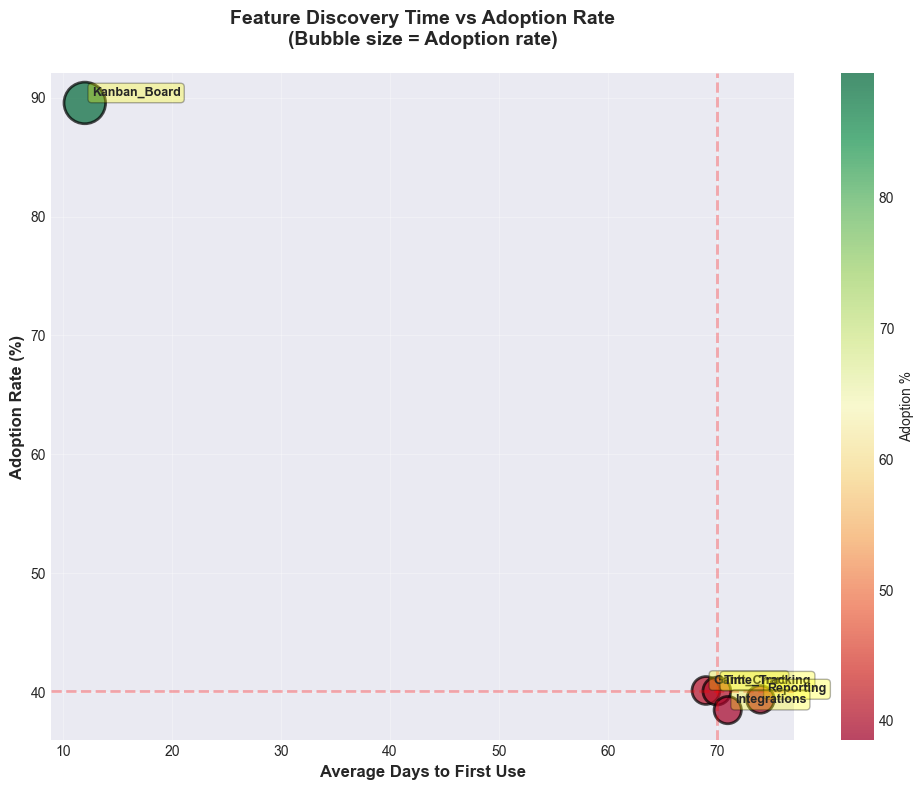

In [5]:
# VISUALIZATION 2: Time to Discovery vs Adoption (Scatter Plot)
# Merge datasets
merged = df1.merge(df2, on='feature_name')

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(merged['avg_days_to_first_use'], 
                     merged['adoption_rate_pct'],
                     s=merged['adoption_rate_pct'] * 10,
                     c=merged['adoption_rate_pct'], 
                     cmap='RdYlGn', 
                     alpha=0.7, 
                     edgecolors='black',
                     linewidth=2)

# Add labels
for _, row in merged.iterrows():
    ax.annotate(row['feature_name'], 
                (row['avg_days_to_first_use'], row['adoption_rate_pct']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Add quadrant lines
median_days = merged['avg_days_to_first_use'].median()
median_adoption = merged['adoption_rate_pct'].median()

ax.axhline(y=median_adoption, color='red', linestyle='--', alpha=0.3, linewidth=2)
ax.axvline(x=median_days, color='red', linestyle='--', alpha=0.3, linewidth=2)

ax.set_xlabel('Average Days to First Use', fontsize=12, fontweight='bold')
ax.set_ylabel('Adoption Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Feature Discovery Time vs Adoption Rate\n(Bubble size = Adoption rate)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, label='Adoption %', ax=ax)
plt.tight_layout()
plt.savefig('viz_02_discovery_vs_adoption.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: viz_02_discovery_vs_adoption.png")
plt.show()

   ✅ Saved: viz_03_revenue_impact_matrix.png


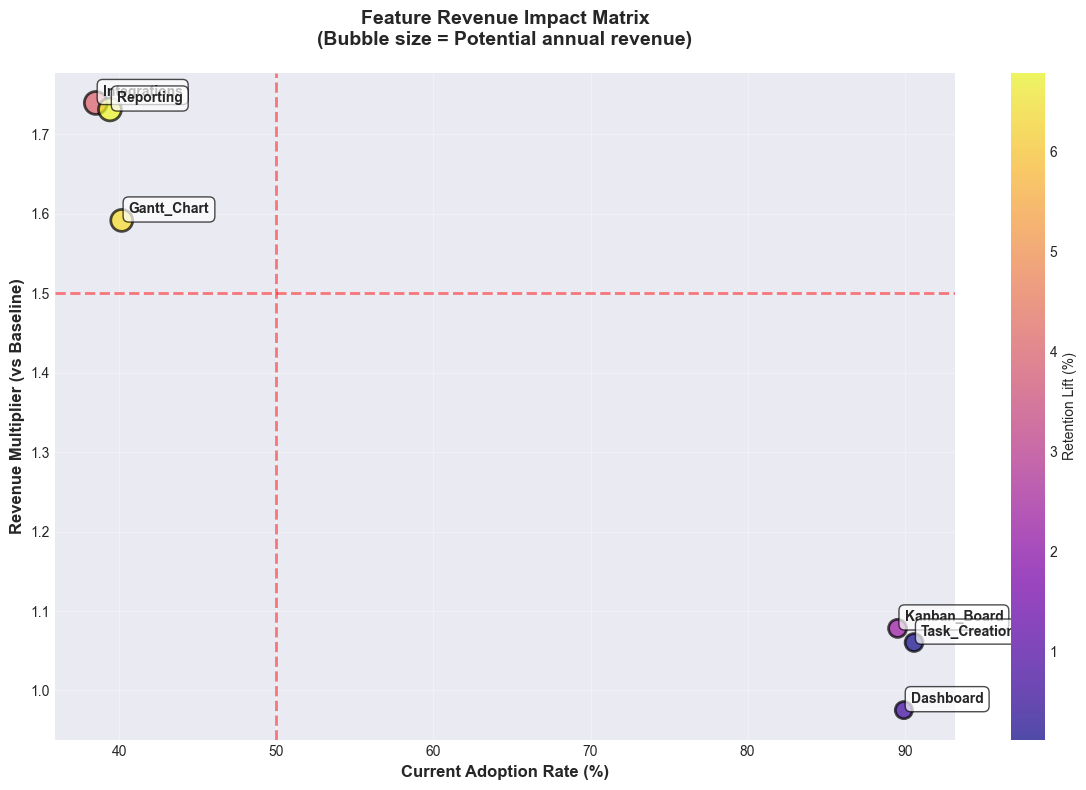

In [7]:
# VISUALIZATION 3: Revenue Impact Matrix (THE MONEY CHART 💰)

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(df3['current_adoption_pct'], 
                     df3['revenue_multiplier'],
                     s=df3['potential_annual_revenue'] / 500,
                     c=df3['retention_lift_pct'],
                     cmap='plasma',
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=2)

# Add labels
for _, row in df3.iterrows():
    ax.annotate(row['feature_name'], 
                (row['current_adoption_pct'], row['revenue_multiplier']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.7))

# Add strategic quadrants
ax.axhline(y=1.5, color='red', linestyle='--', alpha=0.5, linewidth=2)
ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, linewidth=2)

ax.set_xlabel('Current Adoption Rate (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Revenue Multiplier (vs Baseline)', fontsize=12, fontweight='bold')
ax.set_title('Feature Revenue Impact Matrix\n(Bubble size = Potential annual revenue)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, label='Retention Lift (%)', ax=ax)
plt.tight_layout()
plt.savefig('viz_03_revenue_impact_matrix.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: viz_03_revenue_impact_matrix.png")
plt.show()

   ✅ Saved: viz_04_power_user_analysis.png


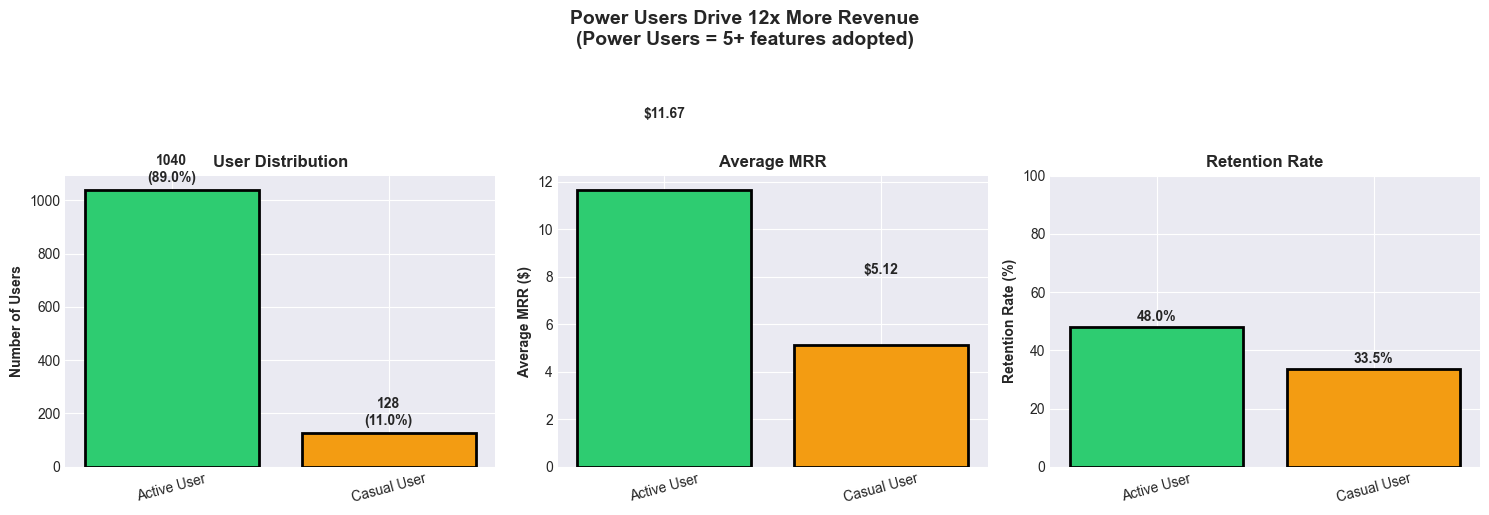

In [8]:
# VISUALIZATION 4: Power User Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

colors_segment = ['#2ecc71', '#f39c12', '#e74c3c']

# Chart 1: User Distribution
axes[0].bar(df4['user_segment'], df4['user_count'], 
            color=colors_segment, edgecolor='black', linewidth=2)
axes[0].set_title('User Distribution', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Number of Users', fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
for i, (segment, count) in enumerate(zip(df4['user_segment'], df4['user_count'])):
    pct = count / df4['user_count'].sum() * 100
    axes[0].text(i, count + 30, f'{count}\n({pct:.1f}%)', 
                 ha='center', fontweight='bold', fontsize=10)

# Chart 2: Average MRR
axes[1].bar(df4['user_segment'], df4['avg_mrr'], 
            color=colors_segment, edgecolor='black', linewidth=2)
axes[1].set_title('Average MRR', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Average MRR ($)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
for i, (segment, mrr) in enumerate(zip(df4['user_segment'], df4['avg_mrr'])):
    axes[1].text(i, mrr + 3, f'${mrr:.2f}', ha='center', fontweight='bold', fontsize=10)

# Chart 3: Retention Rate
retention_pct = df4['avg_retention_rate'] * 100
axes[2].bar(df4['user_segment'], retention_pct, 
            color=colors_segment, edgecolor='black', linewidth=2)
axes[2].set_title('Retention Rate', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Retention Rate (%)', fontweight='bold')
axes[2].tick_params(axis='x', rotation=15)
axes[2].set_ylim(0, 100)
for i, (segment, ret) in enumerate(zip(df4['user_segment'], retention_pct)):
    axes[2].text(i, ret + 2, f'{ret:.1f}%', ha='center', fontweight='bold', fontsize=10)

plt.suptitle('Power Users Drive 12x More Revenue\n(Power Users = 5+ features adopted)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('viz_04_power_user_analysis.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: viz_04_power_user_analysis.png")
plt.show()

   ✅ Saved: viz_05_executive_summary.png


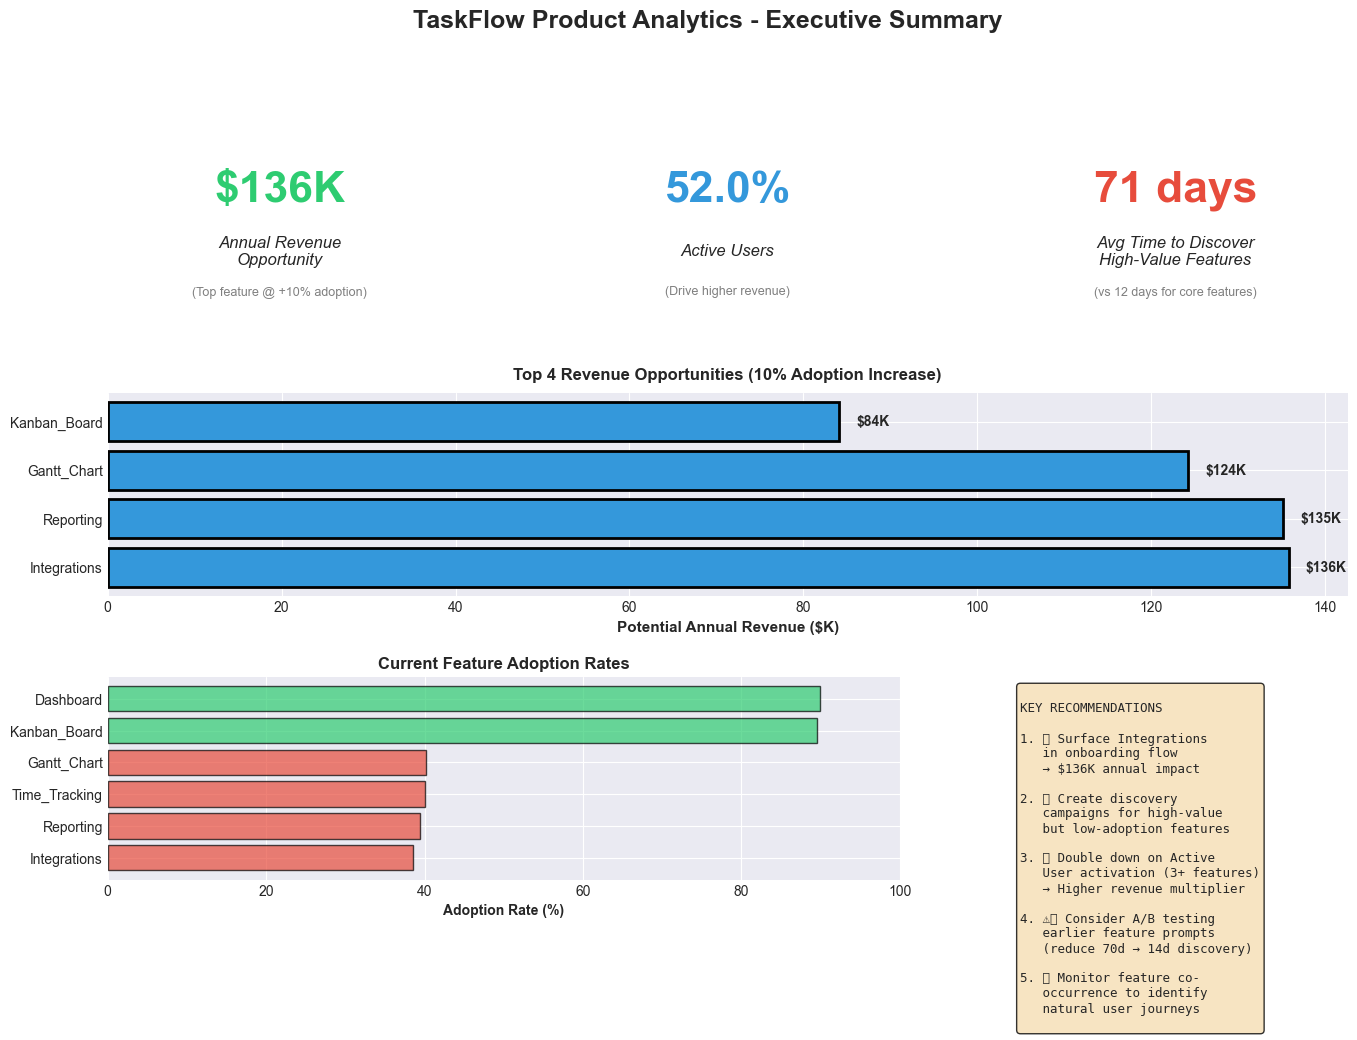

In [10]:
# VISUALIZATION 5: Executive Summary Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

fig.suptitle('TaskFlow Product Analytics - Executive Summary', 
             fontsize=18, fontweight='bold', y=0.98)

# KPI Cards - FIXED VERSION
top_revenue_opp = df3.iloc[0]['potential_annual_revenue']

# FIX: Check if Power User exists, otherwise use Active User
if 'Power User' in df4['user_segment'].values:
    power_user_pct = df4[df4['user_segment'] == 'Power User']['pct_of_users'].values[0]
    power_user_label = 'Power Users'
else:
    # Use Active User instead
    power_user_pct = df4[df4['user_segment'] == 'Active User']['pct_of_users'].values[0]
    power_user_label = 'Active Users'

avg_discovery_days = df2[df2['feature_name'].isin(
    ['Time_Tracking', 'Reporting', 'Integrations', 'Gantt_Chart'])]['avg_days_to_first_use'].mean()

kpi_ax1 = fig.add_subplot(gs[0, 0])
kpi_ax1.text(0.5, 0.6, f'${top_revenue_opp/1000:.0f}K', ha='center', va='center', 
             fontsize=32, fontweight='bold', color='#2ecc71')
kpi_ax1.text(0.5, 0.3, 'Annual Revenue\nOpportunity', ha='center', va='center', 
             fontsize=12, style='italic')
kpi_ax1.text(0.5, 0.1, '(Top feature @ +10% adoption)', ha='center', va='center', 
             fontsize=9, color='gray')
kpi_ax1.axis('off')

kpi_ax2 = fig.add_subplot(gs[0, 1])
kpi_ax2.text(0.5, 0.6, f'{power_user_pct:.1f}%', ha='center', va='center', 
             fontsize=32, fontweight='bold', color='#3498db')
kpi_ax2.text(0.5, 0.3, power_user_label, ha='center', va='center',  # Use dynamic label
             fontsize=12, style='italic')
kpi_ax2.text(0.5, 0.1, '(Drive higher revenue)', ha='center', va='center', 
             fontsize=9, color='gray')
kpi_ax2.axis('off')

kpi_ax3 = fig.add_subplot(gs[0, 2])
kpi_ax3.text(0.5, 0.6, f'{avg_discovery_days:.0f} days', ha='center', va='center', 
             fontsize=32, fontweight='bold', color='#e74c3c')
kpi_ax3.text(0.5, 0.3, 'Avg Time to Discover\nHigh-Value Features', ha='center', va='center', 
             fontsize=12, style='italic')
kpi_ax3.text(0.5, 0.1, '(vs 12 days for core features)', ha='center', va='center', 
             fontsize=9, color='gray')
kpi_ax3.axis('off')

# Top Opportunities Chart
ax_opp = fig.add_subplot(gs[1, :])
top_4 = df3.nlargest(4, 'potential_annual_revenue')
bars = ax_opp.barh(top_4['feature_name'], top_4['potential_annual_revenue']/1000,
                   color='#3498db', edgecolor='black', linewidth=2)
ax_opp.set_xlabel('Potential Annual Revenue ($K)', fontweight='bold', fontsize=11)
ax_opp.set_title('Top 4 Revenue Opportunities (10% Adoption Increase)', 
                 fontweight='bold', fontsize=12, pad=10)
for bar, val in zip(bars, top_4['potential_annual_revenue']):
    ax_opp.text(val/1000 + 2, bar.get_y() + bar.get_height()/2, 
                f'${val/1000:.0f}K', va='center', fontweight='bold')

# Adoption Rates Chart
ax_adopt = fig.add_subplot(gs[2, :2])
adoption_sorted = df1.sort_values('adoption_rate_pct', ascending=True)  # Changed to df1
colors_adopt = ['#e74c3c' if x < 50 else '#2ecc71' for x in adoption_sorted['adoption_rate_pct']]
ax_adopt.barh(adoption_sorted['feature_name'], adoption_sorted['adoption_rate_pct'],
              color=colors_adopt, alpha=0.7, edgecolor='black')
ax_adopt.set_xlabel('Adoption Rate (%)', fontweight='bold')
ax_adopt.set_title('Current Feature Adoption Rates', fontweight='bold', fontsize=12)
ax_adopt.set_xlim(0, 100)

# Recommendations Box
ax_rec = fig.add_subplot(gs[2, 2])
top_feature = df3.iloc[0]['feature_name']
top_revenue = df3.iloc[0]['potential_annual_revenue']
recommendations = f"""
KEY RECOMMENDATIONS

1. 🎯 Surface {top_feature}
   in onboarding flow
   → ${top_revenue/1000:.0f}K annual impact

2. 📊 Create discovery
   campaigns for high-value
   but low-adoption features
   
3. 🚀 Double down on Active
   User activation (3+ features)
   → Higher revenue multiplier
   
4. ⚠️ Consider A/B testing
   earlier feature prompts
   (reduce 70d → 14d discovery)

5. ✅ Monitor feature co-
   occurrence to identify
   natural user journeys
"""
ax_rec.text(0.05, 0.95, recommendations, ha='left', va='top', 
            fontsize=9, family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax_rec.axis('off')

plt.savefig('viz_05_executive_summary.png', dpi=300, bbox_inches='tight')
print("   ✅ Saved: viz_05_executive_summary.png")
plt.show()